<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r10-i2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pickle

Importing Dataset from GitHub

Train Data

In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r10/2-fft-malicious-n-0-15-m-1-r10.csv?token=AKVFSOC76AIFOVTWA6B5Y4K63I6YK')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r10/2-fft-malicious-n-0-15-m-11-r10.csv?token=AKVFSOF6CTQCKY7F6NUI5SS63I6YO')

df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r10/2-fft-malicious-n-0-4-m-1-r10.csv?token=AKVFSOBBVGUUAMNL4QRNMJ263I6YS')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r10/2-fft-malicious-n-0-4-m-11-r10.csv?token=AKVFSOAO6VUG5FLMAD7FGU263I6YU')

df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r10/2-fft-malicious-n-0-6-m-1-r10.csv?token=AKVFSOBYKFM4AMUSPI5EMGK63I6YW')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r10/2-fft-malicious-n-0-6-m-11-r10.csv?token=AKVFSOCZWXRCAH6GUOR2E5263I6Y2')

df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r10/2-fft-malicious-n-0-9-m-1-r10.csv?token=AKVFSOE6YNUMPQFIADSQ2QS63I6Y6')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r10/2-fft-malicious-n-0-9-m-11-r10.csv?token=AKVFSOB6APWSDUTGDCIWEFK63I6ZC')

df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r10/2-fft-normal-n-0-15-r10.csv?token=AKVFSOBIWMVOSTJDKPI5LYS63I6ZC')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r10/2-fft-normal-n-0-4-r10.csv?token=AKVFSODP7N4VNWSIZONSTCK63I6ZG')
df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r10/2-fft-normal-n-0-6-r10.csv?token=AKVFSOBT4YWOQSKZ65ESDO263I6ZM')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r10/2-fft-normal-n-0-9-r10.csv?token=AKVFSOG7KHMB3WWUZV3QJTK63I6ZO')

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df11.shape)
print(df12.shape)

(49633, 26)
(67981, 26)
(47456, 26)
(66380, 26)
(55371, 26)
(74366, 26)
(59731, 26)
(78833, 26)
(33710, 26)
(31520, 26)
(39484, 26)
(43808, 26)


In [0]:
df = df1.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df5, ignore_index=True,sort=False)
df = df.append(df6, ignore_index=True,sort=False)
df = df.append(df7, ignore_index=True,sort=False)
df = df.append(df8, ignore_index=True,sort=False)
df = df.append(df9, ignore_index=True,sort=False)
df = df.append(df10, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)

df = df.sort_values('timestamp')
df.to_csv('fft-r10-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r10-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,9,9,23,7,2,3,1,0.333333,8,22,1,22,22,8,8,3,27,1
1,11,2,4,1,1,4,3,9,9,9,23,7,2,3,1,0.333333,8,42,1,42,42,8,8,3,27,0
2,11,2,4,1,1,4,3,9,9,9,23,7,3,3,1,0.333333,8,31,1,31,31,8,12,3,27,0
3,80,4,2,1,1,4,3,9,11,11,24,8,4,3,1,0.333333,8,37,1,37,37,8,16,3,27,0
4,80,4,2,1,1,4,3,9,11,11,24,8,4,3,1,0.333333,8,41,2,42,82,8,16,3,27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648268,3276918,4,2,6,2,2,3,9,27,11,24,8,30095,3,1,0.333333,15,5,15,19,75,8,722280,18,162,0
648269,3276925,4,2,6,3,2,3,9,27,11,24,8,30095,3,1,0.333333,22,4,16,19,64,8,1083420,18,162,0
648270,3276932,4,2,6,4,2,3,9,27,11,24,8,30095,3,1,0.333333,29,3,17,19,51,8,1444560,18,162,0
648271,3276939,4,2,6,5,3,3,9,27,11,24,8,30095,3,1,0.333333,36,2,18,19,36,8,2708550,18,162,0


In [0]:
df.shape

(648273, 26)

Test Data

In [0]:
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-15-m-12-r9.csv?token=AKVFSOBOHTVG3MJMJANN6WK63I6C2')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-15-m-7-r9.csv?token=AKVFSOB6G5XYPI2M2MYYVWK63I6C4')
df15 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-4-m-12-r9.csv?token=AKVFSOFKWAFM52ARWFNRYAS63I6C6')
df16 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-4-m-7-r9.csv?token=AKVFSODAQD7CE6W6GUDPTZC63I6DA')
df17 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-6-m-12-r9.csv?token=AKVFSOFBWSLMJUQVAPKAEX263I6DE')
df18 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-6-m-7-r9.csv?token=AKVFSOGY6QHT5NN24KL7E7C63I6DI')
df19 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-9-m-12-r9.csv?token=AKVFSOALONLIOJZTZCXCUTC63I6DM')
df20 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%204/router-dataset/r9/2-fft-malicious-n-0-9-m-7-r9.csv?token=AKVFSOHCIKUWUJA7HJX3UK263I6DO')

In [0]:
print(df13.shape)
print(df14.shape)
print(df15.shape)
print(df16.shape)
print(df17.shape)
print(df18.shape)
print(df19.shape)
print(df20.shape)

(56360, 26)
(52835, 26)
(53293, 26)
(50604, 26)
(53066, 26)
(50369, 26)
(105301, 26)
(102607, 26)


In [0]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
0,136,3,4,4,1,1,5,17,24,8,6,6,4,3,2,0.666667,12,41,1,41,41,12,16,20,340,0
1,137,3,4,4,2,2,5,17,24,8,6,6,4,3,2,0.666667,13,40,2,41,80,12,64,20,340,0
2,138,3,4,4,3,2,5,17,24,8,6,6,4,3,2,0.666667,14,39,3,41,117,12,96,20,340,0
3,139,3,4,4,4,2,5,17,24,8,6,6,4,3,2,0.666667,15,38,4,41,152,12,128,20,340,0
4,143,3,4,4,5,3,5,17,24,8,6,6,4,3,2,0.666667,19,37,5,41,185,12,240,20,340,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55366,3265453,1,2,3,1,4,3,9,27,11,30,14,30080,2,1,0.500000,9,5,15,19,75,2,360960,9,81,0
55367,3265454,4,2,4,2,2,5,17,27,11,0,0,30080,5,1,0.200000,10,4,16,19,64,8,481280,20,340,0
55368,3265455,4,2,4,3,2,5,17,27,11,0,0,30080,5,1,0.200000,11,3,17,19,51,8,721920,20,340,0
55369,3265456,4,2,4,4,2,5,17,27,11,0,0,30080,5,1,0.200000,12,2,18,19,36,8,962560,20,340,0


Processing

In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
port_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index,target
outport,1.000000,-0.542950,0.144733,0.061790,-0.093179,0.266478,0.307329,0.030830,0.189712,-0.682350,-0.856033,-0.335933,-0.084922,0.012496,-0.054730,-0.049783,0.496439,0.061858,0.321027,0.344201,-0.022012
inport,-0.542950,1.000000,-0.259603,0.008341,-0.012574,0.172612,0.091500,-0.014608,0.159928,0.567688,0.625175,0.083559,-0.008438,-0.005414,-0.010467,-0.017035,0.408841,-0.074668,-0.085947,0.033480,0.016364
cache_coherence_type,0.144733,-0.259603,1.000000,0.283290,-0.427170,-0.206560,-0.210920,0.035595,-0.103012,-0.162735,-0.192471,-0.198443,0.047540,-0.013537,0.025694,0.029081,-0.126854,0.310629,0.676190,0.172155,0.004755
flit_id,0.061790,0.008341,0.283290,1.000000,-0.029716,0.199948,0.173671,0.004103,0.077207,0.011289,-0.028091,0.378933,-0.029731,0.024641,-0.003847,-0.002376,0.082437,0.656726,0.386173,0.294643,-0.002581
flit_type,-0.093179,-0.012574,-0.427170,-0.029716,1.000000,-0.301481,-0.261858,-0.006209,-0.116412,-0.017017,0.042360,0.362621,-0.046151,0.055627,0.007161,0.006588,-0.124309,0.118147,-0.582292,-0.444270,0.003898
vnet,0.266478,0.172612,-0.206560,0.199948,-0.301481,1.000000,0.983836,-0.019409,0.348196,-0.036562,-0.111290,-0.446838,-0.067593,0.013383,-0.040964,-0.045437,0.479967,-0.035227,0.581164,0.923312,0.043141
vc,0.307329,0.091500,-0.210920,0.173671,-0.261858,0.983836,1.000000,-0.018114,0.317120,-0.096015,-0.178376,-0.438115,-0.063850,0.024244,-0.029929,-0.034038,0.427962,-0.042328,0.565368,0.922639,0.045269
traversal_id,0.030830,-0.014608,0.035595,0.004103,-0.006209,-0.019409,-0.018114,1.000000,-0.014634,-0.018101,-0.010733,0.013592,0.107473,0.108420,0.163142,0.099936,0.019476,0.540697,0.014990,-0.006113,-0.251903
hop_count,0.189712,0.159928,-0.103012,0.077207,-0.116412,0.348196,0.317120,-0.014634,1.000000,0.354060,-0.141401,-0.020798,-0.112623,-0.062406,-0.132263,-0.121683,0.382627,-0.026709,0.176502,0.295861,0.036486
current_hop,-0.682350,0.567688,-0.162735,0.011289,-0.017017,-0.036562,-0.096015,-0.018101,0.354060,1.000000,0.798874,0.377579,0.018828,-0.044709,-0.019557,-0.021847,-0.116138,-0.045874,-0.162880,-0.130900,0.032422


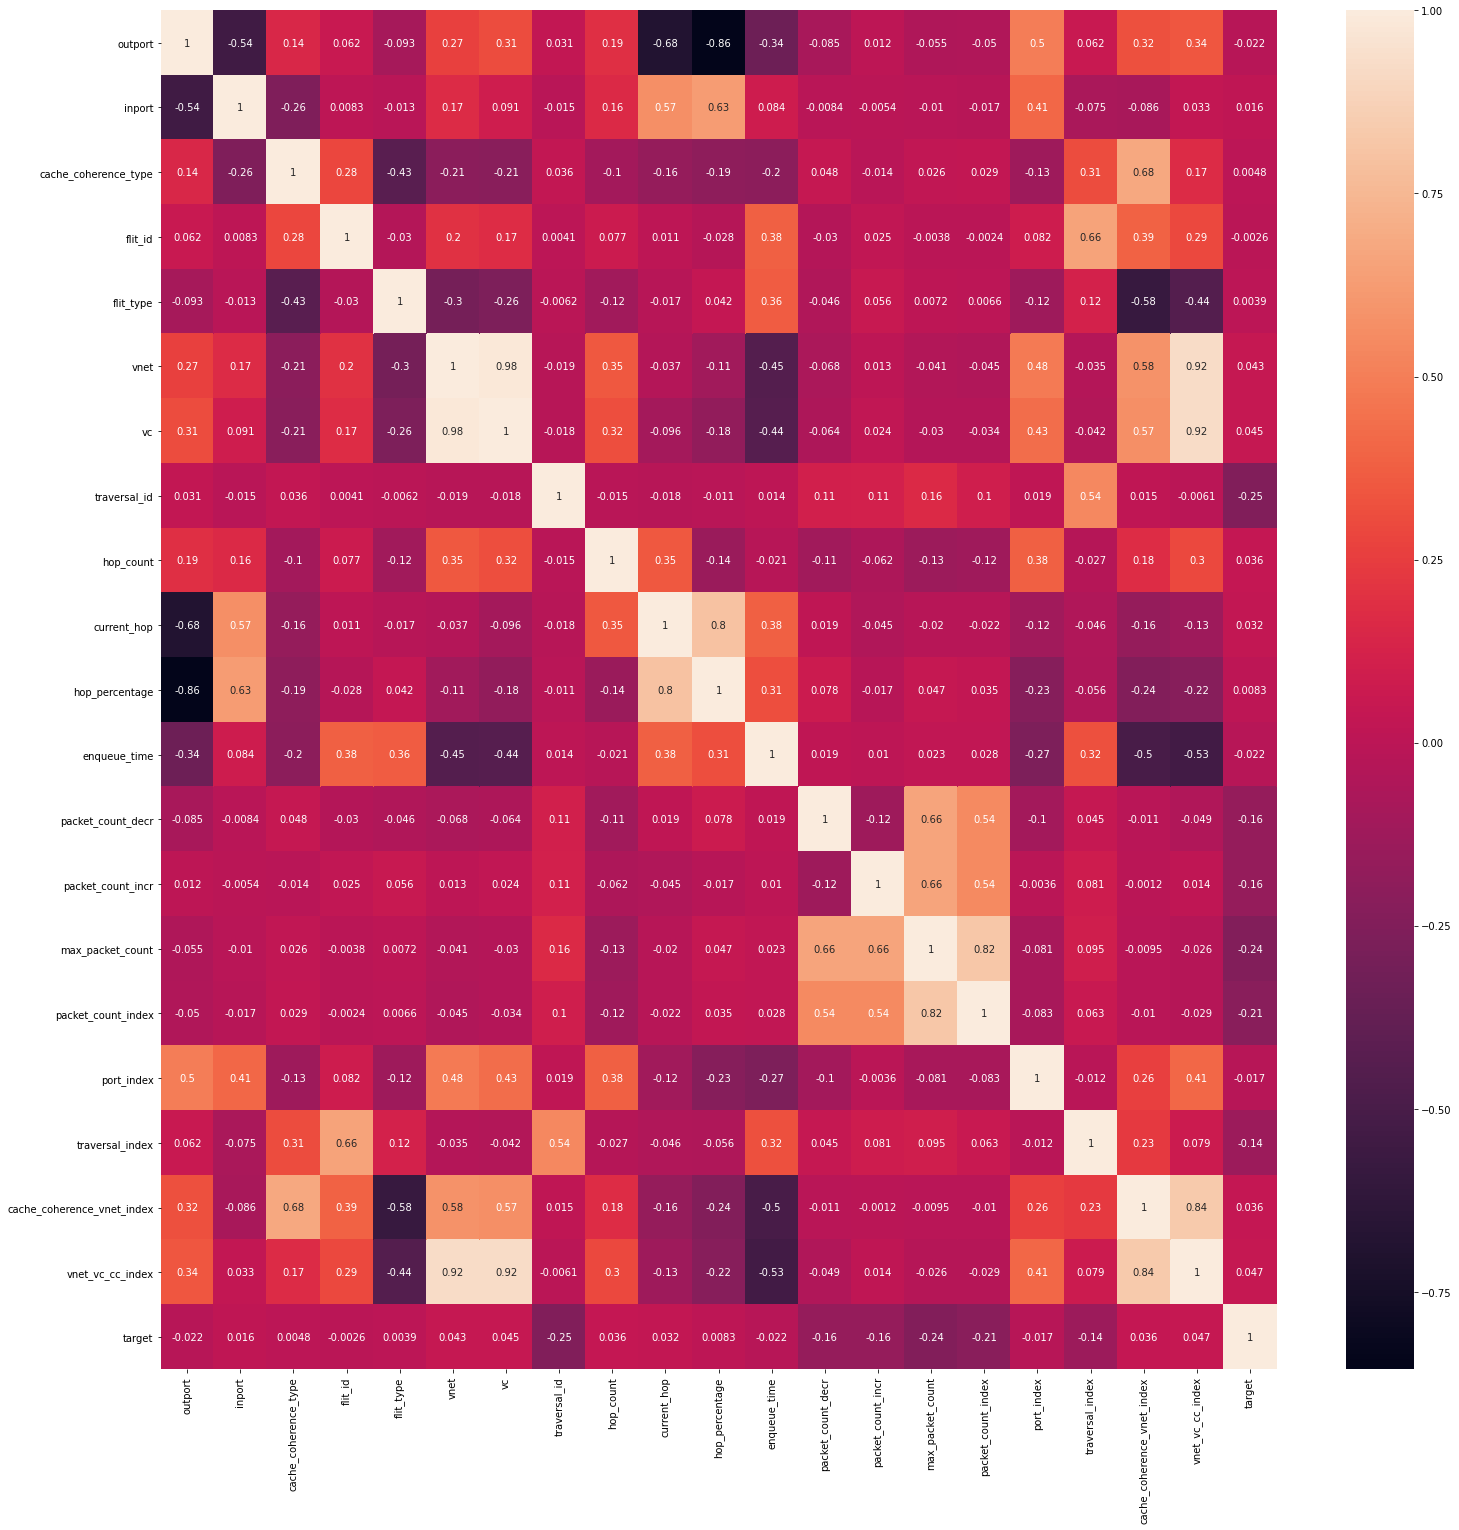

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [0]:
def find_correlation(data, threshold=0.9):
    corr_mat = data.corr()
    corr_mat.loc[:, :] = np.tril(corr_mat, k=-1)
    already_in = set()
    result = []
    for col in corr_mat:
        perfect_corr = corr_mat[col][abs(corr_mat[col])> threshold].index.tolist()
        if perfect_corr and col not in already_in:
            already_in.update(set(perfect_corr))
            perfect_corr.append(col)
            result.append(perfect_corr)
    select_nested = [f[1:] for f in result]
    select_flat = [i for j in select_nested for i in j]
    return select_flat

In [0]:
columns_to_drop = find_correlation(df.drop(columns=['target']))
columns_to_drop

['vnet_vc_cc_index', 'vnet']

In [0]:
#df = df.drop(columns=[''])

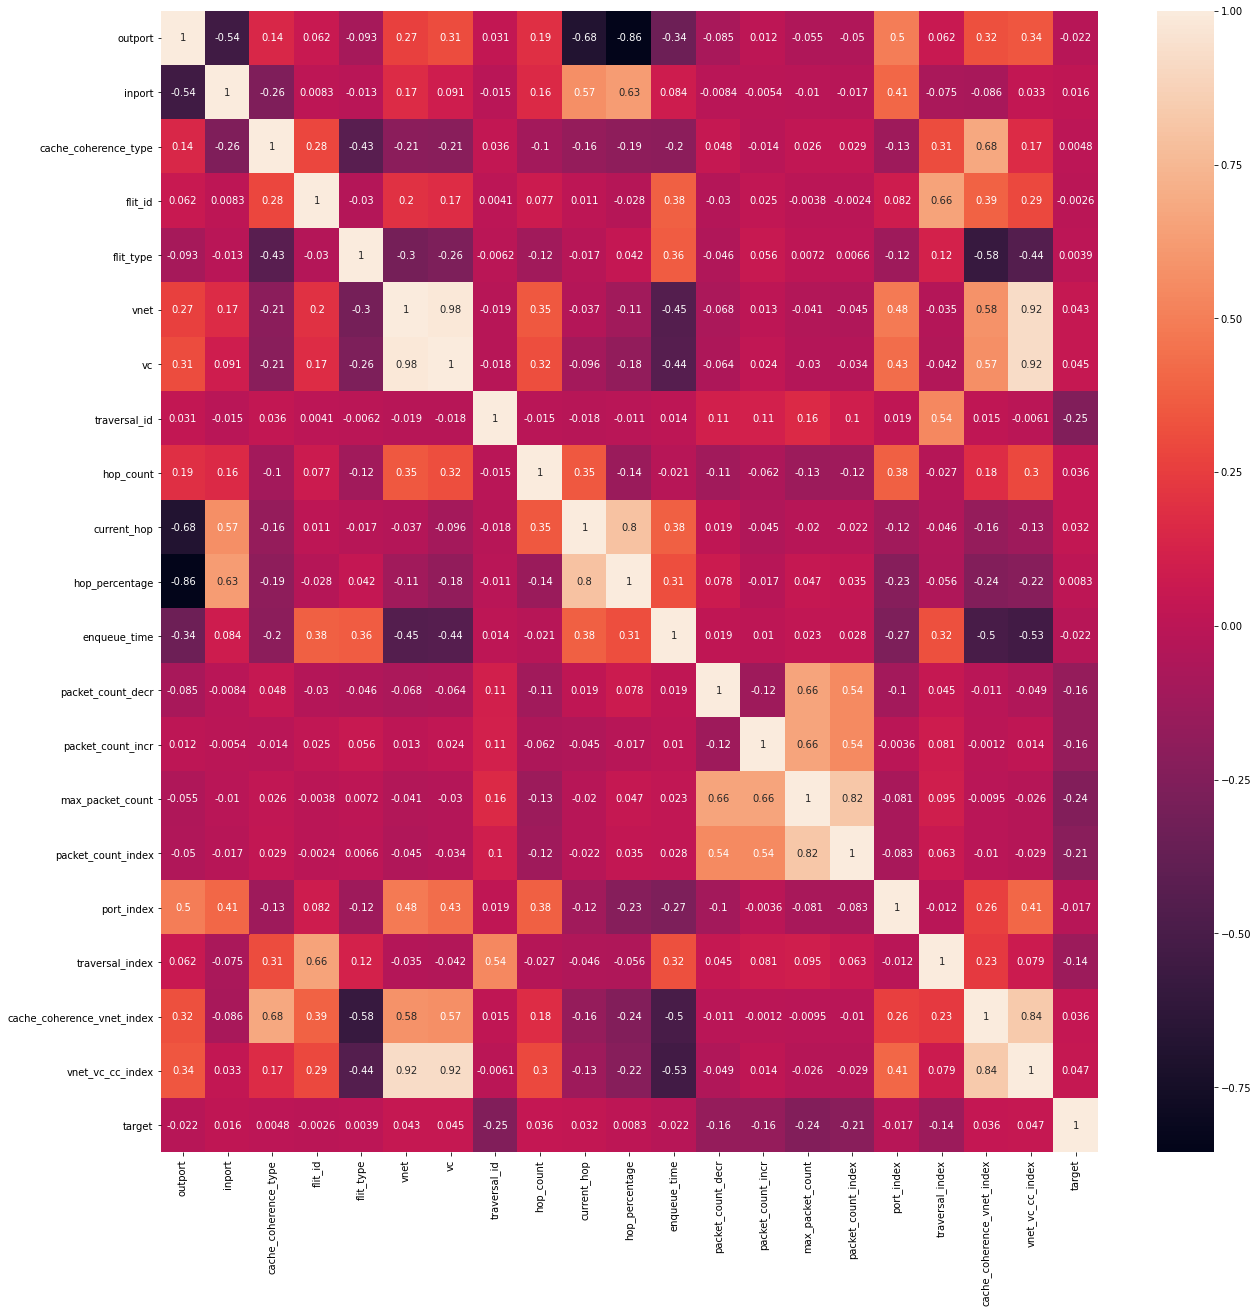

In [0]:
plt.figure(figsize=(21,21))
sns.heatmap(df.corr(), annot = True)
plt.show()

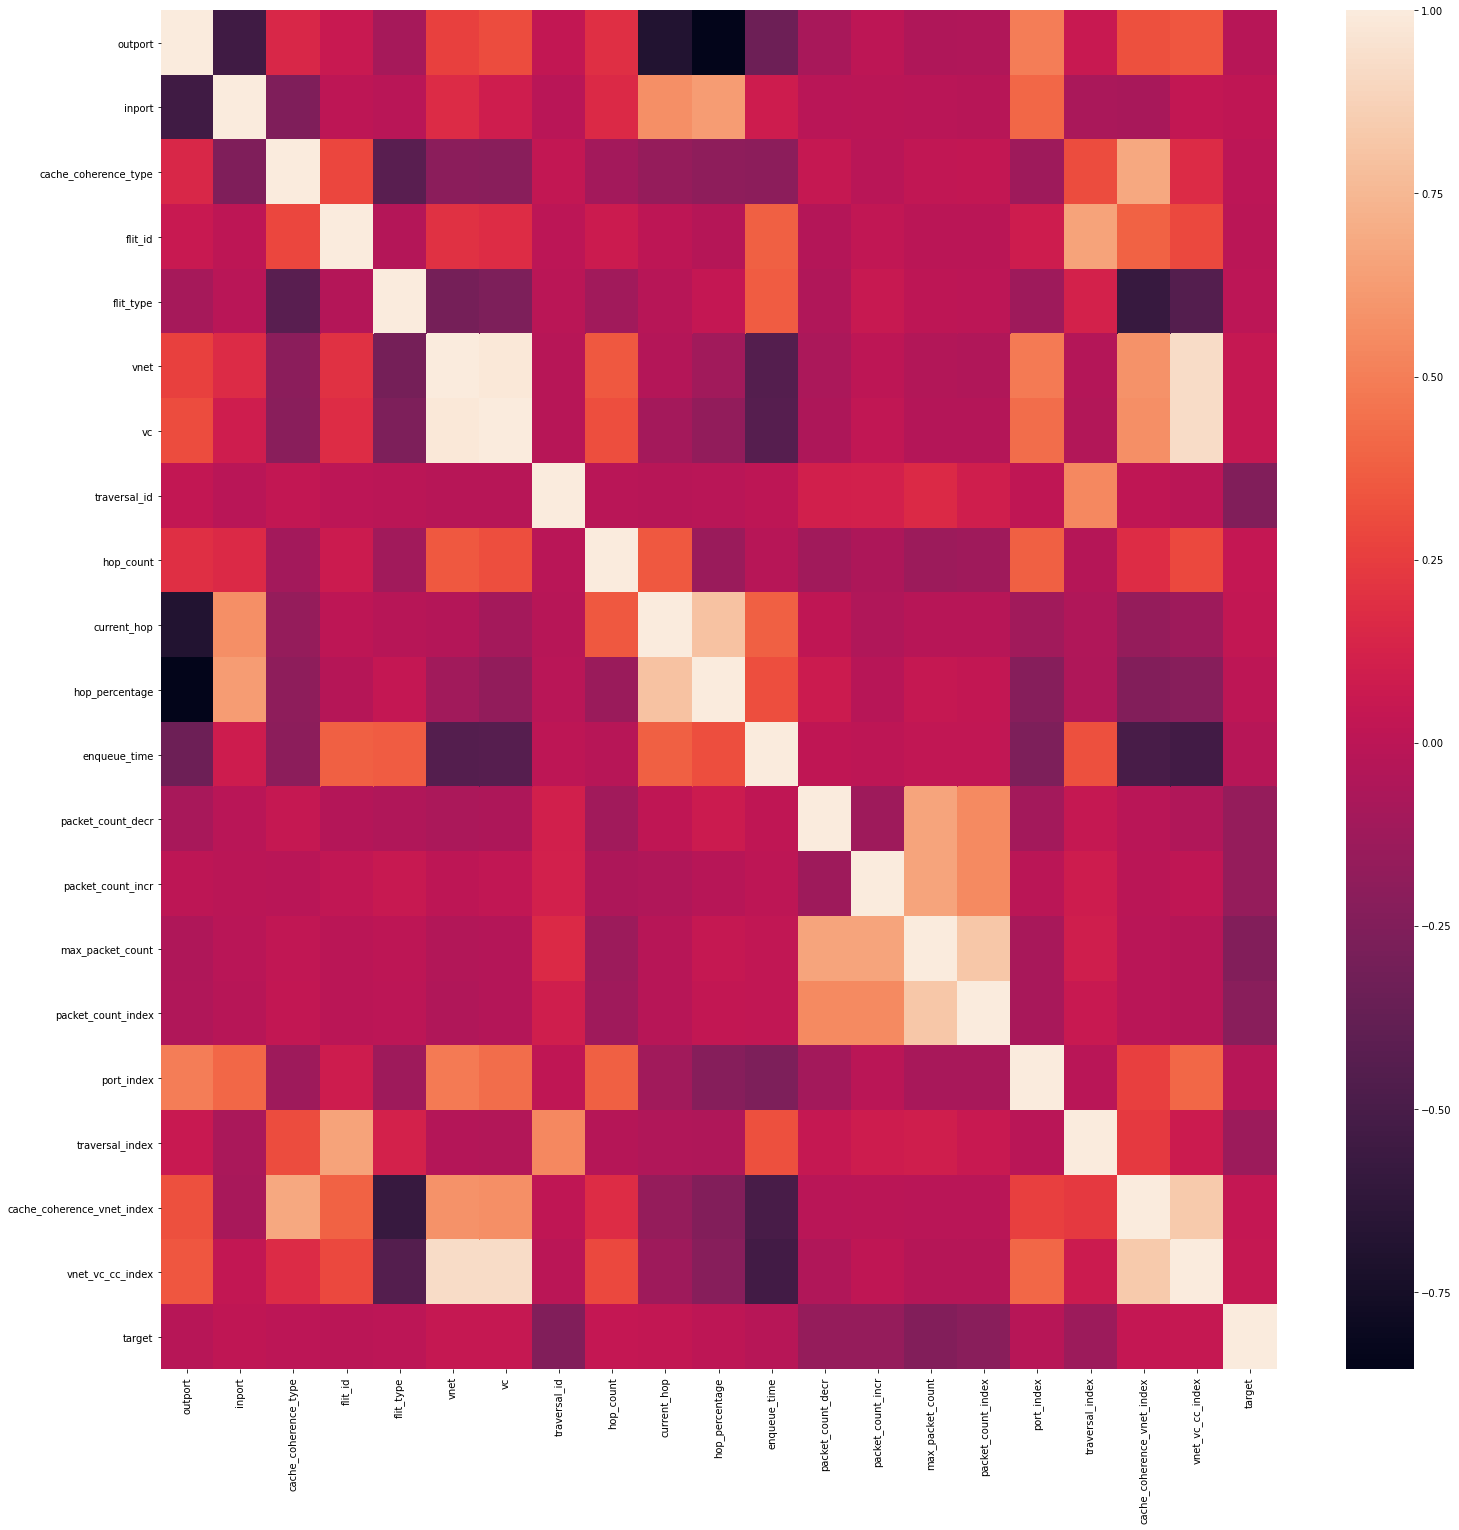

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr())
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_Y = df['target']

In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index
0,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.5,0.25,0.333333,0.066667,0.127273,0.000000,0.127273,0.003012,0.666667,0.000000,0.000000,0.000000
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.5,0.25,0.333333,0.066667,0.248485,0.000000,0.248485,0.005882,0.666667,0.000000,0.000000,0.000000
2,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.5,0.25,0.333333,0.066667,0.181818,0.000000,0.181818,0.004304,0.666667,0.000001,0.000000,0.000000
3,1.0,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000066,0.5,0.25,0.333333,0.066667,0.218182,0.000000,0.218182,0.005164,0.666667,0.000003,0.000000,0.000000
4,1.0,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000066,0.5,0.25,0.333333,0.066667,0.242424,0.006061,0.248485,0.011620,0.666667,0.000003,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
648268,1.0,0.5,0.833333,0.25,0.333333,0.0,0.000000,0.999967,0.5,0.25,0.333333,0.183333,0.024242,0.084848,0.109091,0.010615,0.666667,0.266665,0.833333,0.405405
648269,1.0,0.5,0.833333,0.50,0.333333,0.0,0.000000,0.999967,0.5,0.25,0.333333,0.300000,0.018182,0.090909,0.109091,0.009037,0.666667,0.399998,0.833333,0.405405
648270,1.0,0.5,0.833333,0.75,0.333333,0.0,0.000000,0.999967,0.5,0.25,0.333333,0.416667,0.012121,0.096970,0.109091,0.007173,0.666667,0.533332,0.833333,0.405405
648271,1.0,0.5,0.833333,1.00,0.666667,0.0,0.000000,0.999967,0.5,0.25,0.333333,0.533333,0.006061,0.103030,0.109091,0.005021,0.666667,1.000000,0.833333,0.405405


In [0]:
train_X[train_X.duplicated()].shape

(3285, 20)

In [0]:
test_X = df13.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df13['target']
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
print(test_X[test_X.duplicated()].shape)
test_X

(0, 20)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,port_index,traversal_index,cache_coherence_vnet_index,vnet_vc_cc_index
0,0.50,1.00,0.500000,0.00,0.000000,1.0,0.888889,0.000000,0.75,0.25,0.25,0.065574,0.233333,0.000000,0.233333,0.007527,1.000,0.000000,0.944444,0.939940
1,0.50,1.00,0.500000,0.25,0.333333,1.0,0.888889,0.000000,0.75,0.25,0.25,0.081967,0.225000,0.008333,0.233333,0.014785,1.000,0.000018,0.944444,0.939940
2,0.50,1.00,0.500000,0.50,0.333333,1.0,0.888889,0.000000,0.75,0.25,0.25,0.098361,0.216667,0.016667,0.233333,0.021505,1.000,0.000030,0.944444,0.939940
3,0.50,1.00,0.500000,0.75,0.333333,1.0,0.888889,0.000000,0.75,0.25,0.25,0.114754,0.208333,0.025000,0.233333,0.027688,1.000,0.000041,0.944444,0.939940
4,0.50,1.00,0.500000,1.00,0.666667,1.0,0.888889,0.000000,0.75,0.25,0.25,0.180328,0.200000,0.033333,0.233333,0.033333,1.000,0.000083,0.944444,0.939940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56355,0.75,0.25,0.666667,0.25,0.333333,0.0,0.000000,0.999967,1.00,1.00,0.80,0.311475,0.033333,0.008333,0.041667,0.002419,0.375,0.222277,0.666667,0.324324
56356,0.75,0.25,0.666667,0.50,0.333333,0.0,0.000000,0.999967,1.00,1.00,0.80,0.426230,0.025000,0.016667,0.041667,0.002957,0.375,0.333418,0.666667,0.324324
56357,0.75,0.25,0.666667,0.75,0.333333,0.0,0.000000,0.999967,1.00,1.00,0.80,0.540984,0.016667,0.025000,0.041667,0.002957,0.375,0.444559,0.666667,0.324324
56358,0.75,0.25,0.666667,1.00,0.666667,0.0,0.000000,0.999967,1.00,1.00,0.80,0.655738,0.008333,0.033333,0.041667,0.002419,0.375,0.833554,0.666667,0.324324


In [0]:
test_X1 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df14['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)

(0, 20)


In [0]:
test_X2 = df15.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df15['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)

(0, 20)


In [0]:
test_X3 = df16.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df16['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)

(0, 20)


In [0]:
test_X4 = df17.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df17['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)

(0, 20)


In [0]:
test_X5 = df18.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df18['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)

(0, 20)


In [0]:
test_X6 = df19.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df19['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)

(0, 20)


In [0]:
test_X7 = df20.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y7 = df20['target']
x = test_X7.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X7.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X7 = pd.DataFrame(x_scaled)
test_X7.columns = columns
print(test_X7[test_X7.duplicated()].shape)

(0, 20)


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    499751
1    148522
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
7                 traversal_id  5531.484270
14            max_packet_count  3199.374926
15          packet_count_index  2753.313778
17             traversal_index  1765.563428
12           packet_count_decr  1603.056032
13           packet_count_incr  1596.321674
5                         vnet   661.287029
6                           vc   544.003037
19            vnet_vc_cc_index   229.125942
9                  current_hop   101.018023
8                    hop_count    95.770847
18  cache_coherence_vnet_index    73.691110
0                      outport    47.401207
11                enqueue_time    32.527264
16                  port_index    26.031360
1                       inport    24.101869
10              hop_percentage     8.428466


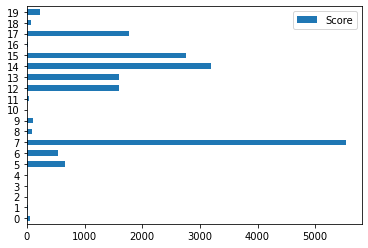

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=20,max_features=20,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=20, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
pickle.dump(dt, open("dt-r10.pickle.dat", 'wb'))

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 96.1698205615694
Test Prediction Score 95.36307894026454


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X7)
dt_score_test = accuracy_score(test_Y7,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 85.61036195883605
Test Prediction Score 86.42755749029999
Test Prediction Score 85.77862008143659
Test Prediction Score 85.05651727136194
Test Prediction Score 85.29378509780273
Test Prediction Score 83.37270940459409
Test Prediction Score 86.3125706308582
Test Prediction Score 86.10523648484022


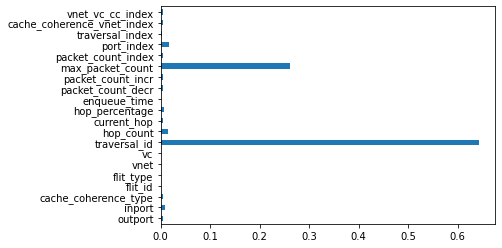

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

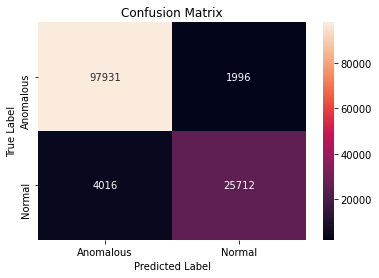

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     99927
           1       0.93      0.86      0.90     29728

    accuracy                           0.95    129655
   macro avg       0.94      0.92      0.93    129655
weighted avg       0.95      0.95      0.95    129655



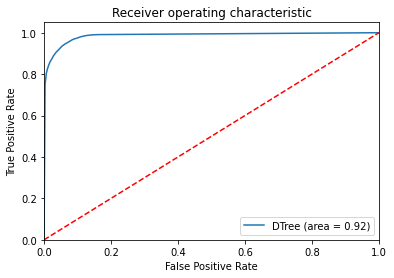

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

XGB Classifier

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
xgbc = XGBClassifier(max_depth=20,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

In [0]:
pickle.dump(xgbc, open("xgbc-r10.pickle.dat", 'wb'))

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [0]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.98843079106395
Test Prediction Score 99.57194092013421


In [0]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X7)
xgbc_score_test = accuracy_score(test_Y7,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 86.57735982966643
Test Prediction Score 87.50828049588341
Test Prediction Score 87.44675660968608
Test Prediction Score 86.32123942771322
Test Prediction Score 87.04820412316737
Test Prediction Score 85.92983779705771
Test Prediction Score 89.02764456178004
Test Prediction Score 89.34965450700246


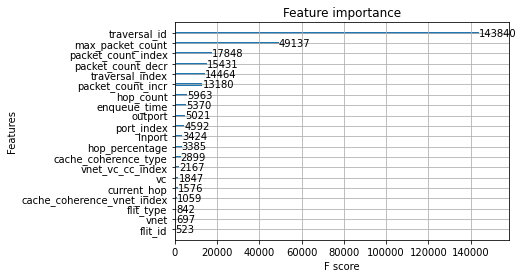

In [0]:
plot_importance(xgbc)
plt.show()

In [0]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99927
           1       0.99      0.99      0.99     29728

    accuracy                           1.00    129655
   macro avg       0.99      0.99      0.99    129655
weighted avg       1.00      1.00      1.00    129655



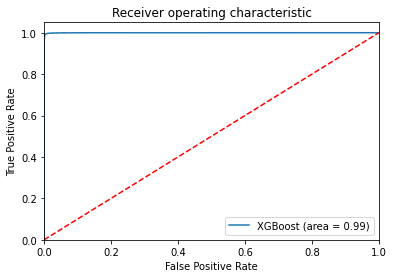

In [0]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()